In [1]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
# To avoid the kernel dead state
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [3]:
def plot_curves(hist):
    accuracy = hist.history["accuracy"]
    val_accuracy = hist.history["val_accuracy"]
    loss = hist.history["loss"]
    val_loss = hist.history["val_loss"]
    epochs = range(1, len(accuracy) + 1)

    plt.plot(epochs, accuracy, "r", label="Training accuracy")
    plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
    plt.title("Training and validation accuracy")
    plt.legend()
    plt.figure()

    plt.plot(epochs, loss, "r", label="Training loss")
    plt.plot(epochs, val_loss, "b", label="Validation loss")
    plt.title("Training and validation loss")
    plt.legend()
    plt.show()

In [4]:
# path to training and vaildation data
train_dir = "train"
val_dir = "val"
test_dir = "test"

image_size = (150, 150)    # target image size
batch_size = 64

In [5]:
train_datagen = ImageDataGenerator(
                      rotation_range=40,
                      width_shift_range=.2,
                      height_shift_range=.2,
                      shear_range=.2,
                      zoom_range=.2,
                      horizontal_flip=True,
                      fill_mode='nearest'
                  )

train_ds = train_datagen.flow_from_directory(
                                                directory=train_dir,
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                target_size=(150, 150), 
                                                seed = 43
                                            )

Found 3019 images belonging to 5 classes.


In [6]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    seed=43,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical',
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    seed=43,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical',
)

Found 649 files belonging to 5 classes.
Found 649 files belonging to 5 classes.


# Model - 1

In [8]:
inputs = keras.Input(shape=(150, 150, 3))
x = layers.Rescaling(1./255)(inputs)

x = layers.Conv2D(32, (3, 3), activation="relu")(x) #, padding = 'same', kernel_regularizer = keras.regularizers.L1L2())(x)
# x = layers.Dropout(0.2)(x)
# x = layers.MaxPooling2D(2, 2)(x)

x = layers.Attention()([x, x])

# x = layers.Conv2D(64, (3, 3), activation="relu", padding = 'same', kernel_regularizer = keras.regularizers.L1L2())(x)
# x = layers.Dropout(0.2)(x)
# x = layers.MaxPooling2D(2, 2)(x)

# x = layers.Conv2D(128, (3, 3), activation="relu", padding = 'same', kernel_regularizer = keras.regularizers.L1L2())(x)
# x = layers.Dropout(0.2)(x)
# x = layers.MaxPooling2D(2, 2)(x)

# x = layers.Conv2D(256, (3, 3), activation="relu", padding = 'same', kernel_regularizer = keras.regularizers.L1L2())(x)
# x = layers.Dropout(0.2)(x)
# x = layers.MaxPooling2D(2, 2)(x)

# x = layers.Conv2D(512, (3, 3), activation="relu", padding = 'same', kernel_regularizer = keras.regularizers.L1L2())(x)
# x = layers.Dropout(0.2)(x)
# x = layers.MaxPooling2D(2, 2)(x)

x = layers.Flatten()(x)
# x = layers.Dense(512, activation = "relu")(x) #, kernel_regularizer = keras.regularizers.L1L2())(x)
# x = layers.Dropout(0.2)(x)
outputs = layers.Dense(5, activation="softmax")(x)
model_1 = keras.Model(inputs, outputs)

In [9]:
model_1.compile(loss="categorical_crossentropy",
             metrics=["accuracy"],
             optimizer="rmsprop")

hist_1 = model_1.fit(train_ds, epochs=20, validation_data=val_ds)

Epoch 1/20
48/48 [==============================] - 219s 5s/step - loss: 13.2154 - accuracy: 0.3392 - val_loss: 1.4359 - val_accuracy: 0.4438
Epoch 2/20
48/48 [==============================] - 147s 3s/step - loss: 1.3930 - accuracy: 0.4273 - val_loss: 1.3965 - val_accuracy: 0.4345
Epoch 3/20
48/48 [==============================] - 147s 3s/step - loss: 1.3243 - accuracy: 0.4690 - val_loss: 1.2993 - val_accuracy: 0.5408
Epoch 4/20
48/48 [==============================] - 148s 3s/step - loss: 1.2631 - accuracy: 0.5111 - val_loss: 1.3713 - val_accuracy: 0.5131
Epoch 5/20
48/48 [==============================] - 147s 3s/step - loss: 1.2317 - accuracy: 0.5336 - val_loss: 1.1796 - val_accuracy: 0.5763
Epoch 6/20
48/48 [==============================] - 149s 3s/step - loss: 1.1919 - accuracy: 0.5462 - val_loss: 1.2808 - val_accuracy: 0.5778
Epoch 7/20
48/48 [==============================] - 151s 3s/step - loss: 1.1824 - accuracy: 0.5760 - val_loss: 1.2975 - val_accuracy: 0.5855
Epoch 8/20
4

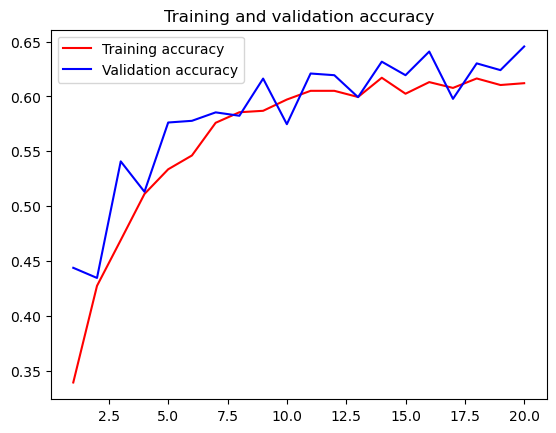

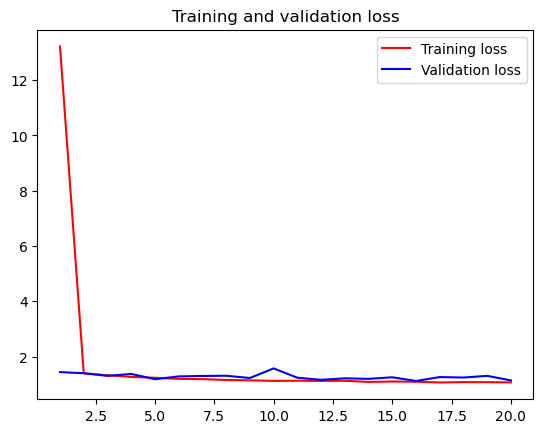

In [10]:
# plot the curves for our base model
plot_curves(hist_1)

In [11]:
model_1.evaluate(test_ds)

11/11 [==============================] - 7s 563ms/step - loss: 1.0479 - accuracy: 0.6579


[1.0478824377059937, 0.6579352617263794]

# Model - 2

In [14]:
inputs = keras.Input(shape=(150, 150, 3))
x = layers.Rescaling(1./255)(inputs)

x = layers.Conv2D(32, (3, 3), activation="relu", padding = 'same', kernel_regularizer = keras.regularizers.L1L2())(x)
x = layers.Dropout(0.2)(x)
x = layers.Attention()([x, x])
x = layers.Dropout(0.2)(x)
x = layers.MaxPooling2D(2, 2)(x)

# x = layers.Conv2D(64, (3, 3), activation="relu", padding = 'same', kernel_regularizer = keras.regularizers.L1L2())(x)
# x = layers.Dropout(0.2)(x)
# x = layers.MaxPooling2D(2, 2)(x)

# x = layers.Conv2D(128, (3, 3), activation="relu", padding = 'same', kernel_regularizer = keras.regularizers.L1L2())(x)
# x = layers.Dropout(0.2)(x)
# x = layers.MaxPooling2D(2, 2)(x)

# x = layers.Conv2D(256, (3, 3), activation="relu", padding = 'same', kernel_regularizer = keras.regularizers.L1L2())(x)
# x = layers.Dropout(0.2)(x)
# x = layers.MaxPooling2D(2, 2)(x)

# x = layers.Conv2D(512, (3, 3), activation="relu", padding = 'same', kernel_regularizer = keras.regularizers.L1L2())(x)
# x = layers.Dropout(0.2)(x)
# x = layers.MaxPooling2D(2, 2)(x)

x = layers.Flatten()(x)
x = layers.Dense(512, activation = "relu", kernel_regularizer = keras.regularizers.L1L2())(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(5, activation="softmax")(x)
model_2 = keras.Model(inputs, outputs)

In [15]:
model_2.compile(loss="categorical_crossentropy",
             metrics=["accuracy"],
             optimizer="rmsprop")

hist_2 = model_2.fit(train_ds, epochs=20, validation_data=val_ds)

Epoch 1/20
48/48 [==============================] - 150s 3s/step - loss: 17.9970 - accuracy: 0.3259 - val_loss: 1.2857 - val_accuracy: 0.4777
Epoch 2/20
48/48 [==============================] - 149s 3s/step - loss: 1.5083 - accuracy: 0.4359 - val_loss: 1.6443 - val_accuracy: 0.4268
Epoch 3/20
48/48 [==============================] - 150s 3s/step - loss: 1.2449 - accuracy: 0.5025 - val_loss: 1.2703 - val_accuracy: 0.4961
Epoch 4/20
48/48 [==============================] - 150s 3s/step - loss: 1.1369 - accuracy: 0.5416 - val_loss: 1.1372 - val_accuracy: 0.5424
Epoch 5/20
48/48 [==============================] - 150s 3s/step - loss: 1.0709 - accuracy: 0.5790 - val_loss: 1.0593 - val_accuracy: 0.5840
Epoch 6/20
48/48 [==============================] - 149s 3s/step - loss: 1.0412 - accuracy: 0.5909 - val_loss: 1.0112 - val_accuracy: 0.5886
Epoch 7/20
48/48 [==============================] - 144s 3s/step - loss: 1.0102 - accuracy: 0.6168 - val_loss: 0.9320 - val_accuracy: 0.6364
Epoch 8/20
4

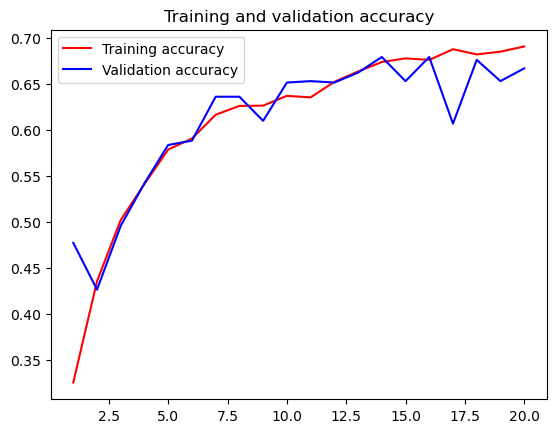

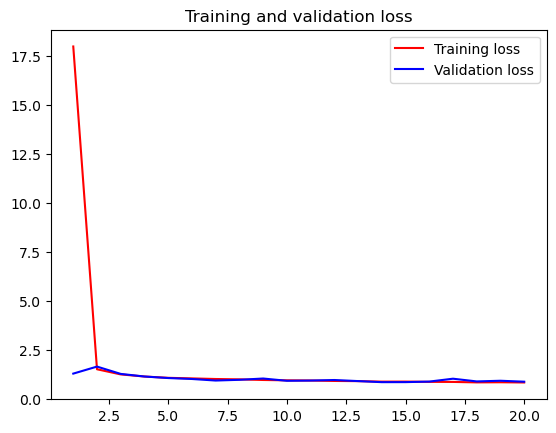

In [16]:
plot_curves(hist_2)

In [17]:
model_2.evaluate(test_ds)

11/11 [==============================] - 7s 628ms/step - loss: 0.8077 - accuracy: 0.6995


[0.8076947927474976, 0.6995377540588379]

# Model - 3

In [20]:
inputs = keras.Input(shape=(150, 150, 3))
x = layers.Rescaling(1./255)(inputs)

x = layers.Conv2D(32, (3, 3), activation="relu", padding = 'same', kernel_regularizer = keras.regularizers.L1L2())(x)
x = layers.Dropout(0.2)(x)
x = layers.Attention()([x, x])
x = layers.Dropout(0.2)(x)
x = layers.MaxPooling2D(2, 2)(x)

x = layers.Conv2D(64, (3, 3), activation="relu", padding = 'same', kernel_regularizer = keras.regularizers.L1L2())(x)
x = layers.Dropout(0.2)(x)
x = layers.Attention()([x, x])
x = layers.Dropout(0.2)(x)
x = layers.MaxPooling2D(2, 2)(x)

x = layers.Conv2D(128, (3, 3), activation="relu", padding = 'same', kernel_regularizer = keras.regularizers.L1L2())(x)
x = layers.Dropout(0.2)(x)
x = layers.Attention()([x, x])
x = layers.Dropout(0.2)(x)
x = layers.MaxPooling2D(2, 2)(x)

x = layers.Conv2D(256, (3, 3), activation="relu", padding = 'same', kernel_regularizer = keras.regularizers.L1L2())(x)
x = layers.Dropout(0.2)(x)
x = layers.Attention()([x, x])
x = layers.Dropout(0.2)(x)
x = layers.MaxPooling2D(2, 2)(x)

x = layers.Conv2D(512, (3, 3), activation="relu", padding = 'same', kernel_regularizer = keras.regularizers.L1L2())(x)
x = layers.Dropout(0.2)(x)
x = layers.Attention()([x, x])
x = layers.Dropout(0.2)(x)
x = layers.MaxPooling2D(2, 2)(x)

x = layers.Flatten()(x)
x = layers.Dense(512, activation = "relu", kernel_regularizer = keras.regularizers.L1L2())(x)
x = layers.Dropout(0.2)(x)

outputs = layers.Dense(5, activation="softmax")(x)
model_3 = keras.Model(inputs, outputs)

In [21]:
model_3.compile(loss="categorical_crossentropy",
             metrics=["accuracy"],
             optimizer="rmsprop")

hist_3 = model_3.fit(train_ds, epochs=20, validation_data=val_ds)

Epoch 1/20
48/48 [==============================] - 351s 7s/step - loss: 1.7340 - accuracy: 0.2905 - val_loss: 1.4861 - val_accuracy: 0.3421
Epoch 2/20
48/48 [==============================] - 451s 9s/step - loss: 1.4403 - accuracy: 0.3465 - val_loss: 1.3660 - val_accuracy: 0.4284
Epoch 3/20
48/48 [==============================] - 453s 9s/step - loss: 1.3786 - accuracy: 0.3909 - val_loss: 1.3858 - val_accuracy: 0.4022
Epoch 4/20
48/48 [==============================] - 433s 9s/step - loss: 1.3155 - accuracy: 0.4117 - val_loss: 1.3599 - val_accuracy: 0.4099
Epoch 5/20
36/48 [=====================>........] - ETA: 1:55 - loss: 1.2723 - accuracy: 0.4416

KeyboardInterrupt: 

In [ ]:
plot_curves(hist_3)

In [ ]:
model_3.evaluate(test_ds)